# nltk(2)
---
All rights reserved, 2021-2023 By Youn-Sik Hong. 수업 목적으로만 활용 가능.

- 참고 사이트: https://www.nltk.org/book/ch01.html
    - nltk book 1. Language Processing and Python 내용을 참고.
    - nltk book의 1장 예제 일부 인용.

## 문자열 연산 기초

### 여러 개 문자열을 다룰 때는 리스트를 사용
- 파이썬에서 list는 square bracket([...])를 사용하여 표현합니다.

In [1]:
ex1 = ['A','closer','look','at','Python']
ex1

['A', 'closer', 'look', 'at', 'Python']

In [2]:
sent = 'Texts as List of Words'
sent

'Texts as List of Words'

리스트 **ex1**의 원소는 콤마로 구분된 5개이지만, 문자열(str) **sent**의 원소는 문자 갯수인 22개입니다.

In [3]:
print(type(ex1), type(sent), len(ex1), len(sent))

<class 'list'> <class 'str'> 5 22


### join(), split() 

**join()**
- 리스트 타입을 str 타입으로 변환합니다.
- 리스트의 원소를 전달받아, 원소들을 구분기호(delimiter)로 모두 연결해서 
    - 하나의 str 객체를 만듭니다. 
- 리스트의 원소와 원소 사이에 delimiter가 삽입됩니다.

In [4]:
ex1join = ';'.join(ex1) #semicolon(;)을 구분기호로 사용
print(type(ex1join), '==>', ex1join)

<class 'str'> ==> A;closer;look;at;Python


**split()**
- join과 반대되는 기능으로, str 타입을 리스트로 변환합니다.
- str 객체를 전달받아 delimiter에서 정의한 기호를 기준으로 
    - 여러 개의 str객체로 나눕니다.

In [5]:
wds = sent.split(' ')
print(type(wds), "==>", wds)

<class 'list'> ==> ['Texts', 'as', 'List', 'of', 'Words']


간단한 응용 예제에 지금까지 배운 걸 적용해 볼까요? 아래 문장은 nltk에서 샘플로 제공하는 단문(single sentence)입니다.

In [6]:
ex_sent1 = "Call me Ishmael ."
ex_sent2 = "The family of Dashwood had long been settled in Sussex ."

In [7]:
new_sent1 = ex_sent1.split(' ')
new_sent2 = ex_sent2.split(' ')
print(new_sent1)
print(new_sent2)

['Call', 'me', 'Ishmael', '.']
['The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.']


## 빈도 분포(frequency distribution)
- 자연어 처리에서 중요한 작업 중 하나는 말뭉치에서 단어 발생빈도를 조사하는 것입니다.
- nltk에서는 빈도 분포 분석을 위해 **FreqDist** 클래스를 사용합니다.
    - 파이썬에서는 FreqDist 클래스와 유사한 **Counter** 컬렉션을 제공하며, 
    - 사용 방법은 거의 같습니다.

In [8]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


단순히 중복되지 않은 단어만 찾을 목적이라면, set 연산을 하면 됩니다.

In [9]:
print(len(text1), len(set(text1)))

260819 19317


- **FreqDist** 클래스의 객체 *fdist1* 를 생성하면 단어 발생빈도도 함께 알 수 있습니다. 
- *fdist1*(dictionary 객체)의 멤버인 단어(key)와 발생빈도(value)를 저장하고 있기 때문이죠.

In [10]:
fdist1 = FreqDist(text1)
print(len(fdist1))
print(type(fdist1.keys()), type(fdist1.values()))

19317
<class 'dict_keys'> <class 'dict_values'>


19,317개 단어를 모두 출력하는 대신 10개 단어만 출력해 보겠습니다.

In [11]:
#print(fdist1.keys())
#print(fdist1.values())

i = 0
for (k, v) in zip(fdist1.keys(), fdist1.values()):
    print('word = {:10s} freq = {:5d}'.format(k, v))
    i += 1
    if (i > 10): break

word = [          freq =     3
word = Moby       freq =    84
word = Dick       freq =    84
word = by         freq =  1137
word = Herman     freq =     1
word = Melville   freq =     1
word = 1851       freq =     3
word = ]          freq =     1
word = ETYMOLOGY  freq =     1
word = .          freq =  6862
word = (          freq =   210


- for, break 를 이것저것 사용하니까 초보 느낌이 납니다. 
    - 다른 방식으로 코딩해 보겠습니다.

In [12]:
slist = [(k, v) for (k, v) in zip(fdist1.keys(), fdist1.values())]
slist[:10]

[('[', 3),
 ('Moby', 84),
 ('Dick', 84),
 ('by', 1137),
 ('Herman', 1),
 ('Melville', 1),
 ('1851', 3),
 (']', 1),
 ('ETYMOLOGY', 1),
 ('.', 6862)]

**FreqDist** 클래스가 생각보다 간단하죠. 이제부터 **FreqDist** 클래스 세계에 풍덩 빠져 보기로 하죠!
- **most_common** 메소드는 발생 빈도 순으로 정렬된 단어를 쉽게 확인할 수 있습니다.
    - **most_common** 메소드는 원소가 *tuple*인 리스트를 반환합니다.
    - tuple은 (*단어, 발생빈도*) 정보를 저장하고 있습니다.

In [13]:
mc50 = fdist1.most_common(50) #상위 50개 단어
mc50[:10]

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

단어별 발생 빈도도 쉽게 확인할 수 있습니다. 
- *fdist1*이 dictionary 객체로 저장하고 있다는 걸 기억하세요.

In [14]:
fdist1['the']
#fdist1['whale']
#fdist1['affection']

13721

- 상위 50개 단어가 전체 단어 중 어느 정도 빈도를 차지하는지 구해 볼 수 있습니다.
    - tuple의 2번째 원소(**e[1]**)인 발생빈도만 모두 더하면 됩니다.
- 19,317개 단어 중 불과 50개 단어가 차지하는 발생빈도가 전체 단어의 47%를 차지합니다.

In [15]:
import numpy as np

sum = 0
for e in mc50:
    sum += e[1]
print('상위 50개 단어 발생빈도 합= %d' % sum)    
print('%2.2f%%'% np.round(sum/len(text1)*100, 5))

상위 50개 단어 발생빈도 합= 121725
46.67%


python을 조금(?) 사용해 본 사람은 for 문을 사용해 코딩하지 않죠. 

In [16]:
sum = np.sum([e[1] for e in mc50])
print('상위 50개 단어 발생빈도 합= {:,}'.format(sum))  

상위 50개 단어 발생빈도 합= 121,725


재롱덩어리 **FreqDist**가 갖고 있는 마지막 재주를 감상해 보기로 하죠.
- **plot** 메소드는 단어의 발생 빈도를 그래프로 출력합니다. 
- 50은 발생 빈도 기준 상위 50개 단어를 가리킵니다.
- 누적 빈도를 보려면 *cumulative* 옵션을 *True*로 설정하면 되구요. 
    - 설정하지 않으면 개별 단어의 빈도를 보여줍니다.

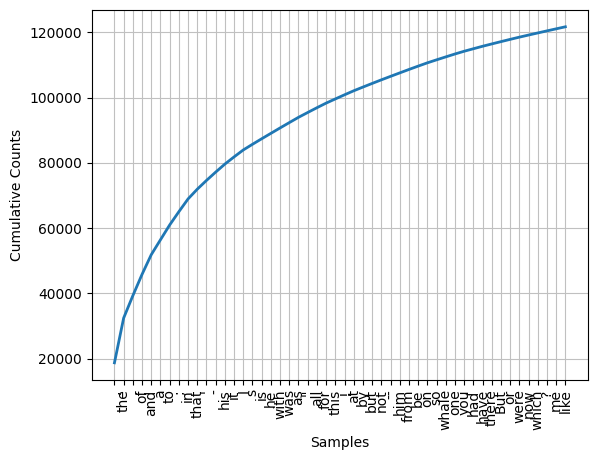

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [17]:
fdist1.plot(50, cumulative=True)
#fdist1.plot(50)

## 빈도 분포 응용
- 단어가 영어 알파벳일 경우 소문자로 변환 후 빈도를 구합니다. 
- 또, 단어 길이가 3이상인 경우로 제한해서 빈도를 구해보겠습니다.

In [18]:
dist = FreqDist(ch.lower() for ch in text1 if ch.isalpha())
#dist = FreqDist(ch.lower() for ch in text1 if ch.isalpha() and len(ch)>2)
len(dist)

16948

In [19]:
dist.most_common(5)

[('the', 14431), ('of', 6609), ('and', 6430), ('a', 4736), ('to', 4625)]

In [20]:
[(char, count) for (char, count) in dist.most_common(10)]

[('the', 14431),
 ('of', 6609),
 ('and', 6430),
 ('a', 4736),
 ('to', 4625),
 ('in', 4172),
 ('that', 3085),
 ('his', 2530),
 ('it', 2522),
 ('i', 2127)]

## 조건을 만족하는 단어 찾기

In [21]:
V = set(text1) #중복 단어 제거

- 단어 길이가 15이상인 단어만 찾아 리스트에 저장합니다. 
- 파이썬 언어의 강점을 살린 이런 코딩 스타일에 익숙해져야 합니다.

In [22]:
long_words = [w for w in V if len(w)>=15]
len(sorted(long_words))

72

In [23]:
long_words[:10]

['thoughtlessness',
 'cannibalistically',
 'phosphorescence',
 'responsibilities',
 'circumnavigation',
 'apprehensiveness',
 'miscellaneously',
 'dissatisfaction',
 'superstitiously',
 'comprehensively']

## 단어 길이에 따른 빈도 분포
- 단어 길이를 기준으로 빈도를 조사합니다. 
- 단어에서 재일 짧은 길이는 1이죠. 그렇다면 가장 길이가 긴 단어는? 조사하면 다 나오죠. 20개입니다.

In [24]:
fdist = FreqDist(len(w) for w in text1)  # fdist = FreqDist(text1)
print(fdist.values())
print(len(fdist.values()))

dict_values([47933, 42345, 38513, 17111, 9966, 6428, 1873, 26597, 14399, 50223, 3528, 1053, 567, 177, 22, 70, 12, 1, 1])
19


In [25]:
print(fdist) #26만개 단어 중 단어 길이는 모두 19개.

<FreqDist with 19 samples and 260819 outcomes>


In [26]:
fdist.most_common() #Suprise! 단어 길이가 19인 단어는 없습니다.  

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

갑자기 길이가 18, 길이가 20인 단어가 궁금해지지 않았나요?

In [27]:
long_18_word = [w for w in text1 if len(w)==18]
long_20_word = [w for w in text1 if len(w)==20]
print(long_18_word, long_20_word)

['characteristically'] ['uninterpenetratingly']


In [28]:
print(fdist.max(), fdist[fdist.max()])

3 50223


길이가 3인 단어의 빈도가 전체 단어 중 19.2%를 차지합니다.

In [29]:
'%2.2f%%' % np.round(fdist.freq(3)*100, 3)

'19.26%'

길이가 5인 단어의 빈도는 전체 단어 중 1.35%에 불과하군요.

In [30]:
'%2.2f%%' % np.round(fdist.freq(10)*100, 3)

'1.35%'

## Quiz: 다음은 무엇을 찾고 싶어 하는 걸까요?

In [31]:
fdist2 = FreqDist(text2)

swords = [w for w in set(text2) if len(w)>3 and fdist2[w]>500]
# 글자수가 3 이상, 빈도수가 500 이상인 단어만 출력
sorted(swords)

['Elinor',
 'Marianne',
 'could',
 'from',
 'have',
 'that',
 'which',
 'with',
 'would']

## 단어 비교 함수 
- **s.endswith(t)**: 문자열 s가 접미어 t를 갖는지 조사합니다.
- **s.istitle()** : 문자열 s가 제목(title)인지 조사합니다. 첫 글자가 대문자인지 조사합니다.
- **s.isdigit()**: 문자열 s가 숫자인지 조사합니다. 
- **t in s** : 부분문자열 t가 문자열 s 에 있는지 조사합니다.

In [32]:
sorted(w for w in set(text1) if w.endswith('ableness'))
#sorted(w for w in set(text1) if w.endswith('cial'))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [33]:
sorted(term for term in set(text4) if 'gnt' in term)
#sorted(term for term in set(text4) if 'ded' in term)

['Sovereignty', 'sovereignties', 'sovereignty']

In [34]:
lst = sorted(item for item in set(text6) if item.istitle())
lst[:10]

['A',
 'Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh']

In [35]:
print(sent7)
sorted(item for item in set(sent7) if item.isdigit())

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']


['29', '61']